## Compare the performance of the scikit and the custom decision tree classifiers

Tested on the Wine Quality dataset from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/wine+quality

## Import of the dataset

In [1]:
import pandas as pd

data = pd.read_csv('winequality-red.csv')
print("Dataset Classes:")
print(data.iloc[:,-1].unique())
data

Dataset Classes:
[5 6 7 4 8 3]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Split the dataset into training and testing sets

In [2]:
x = data.drop(columns="quality")

y = data["quality"]

#split the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Search Space for Hyperparameter Tuning

In [3]:
params = dict()
# max depth list from 1 to 20
params['max_depth'] = list(range(1, 21))
params['min_samples_split'] = list(range(2, 6))
params['min_samples_leaf'] = list(range(1, 5))
print(params)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4]}


## K-Fold Cross Validation

In [4]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

## Initialize Optimizer

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

search = GridSearchCV(estimator=clf, param_grid=params, cv=cv, scoring ='accuracy', verbose=0)

from my_tree import CustomDecisionTreeClassifier
from fast_parameter_search import MyGridSearchCV

my_clf = CustomDecisionTreeClassifier()

my_search = MyGridSearchCV(my_clf, params, cv=cv)


## Results

In [6]:
#Scikit Learn Decision Tree
search.fit(x_train, y_train)
print("Scikit Learn Decision Tree")
print("Best score", search.best_score_)
print("Best parameters", search.best_params_)

# My Decision Tree
my_search.fit(x_train, y_train)
print("Custom Decision Tree")
print("Best score", my_search.best_score)
print("Best parameters", my_search.best_params)

Scikit Learn Decision Tree
Best score 0.6036039624183006
Best parameters {'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2}
Custom Decision Tree
Best score 0.6137612336601307
Best parameters {'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1}


## Test the Models

## Scikit Decision Tree Classifier

Test Accuracy 0.559375
[[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


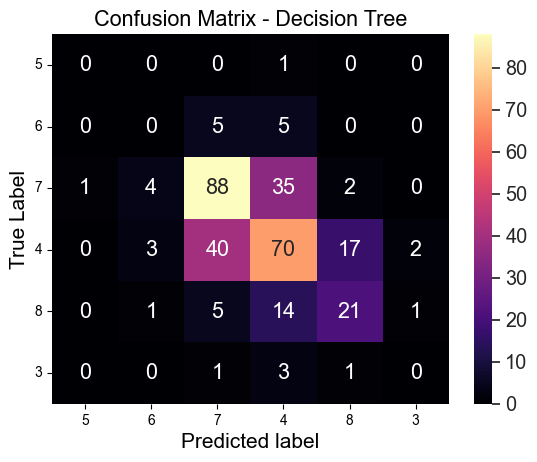

<Figure size 1000x700 with 0 Axes>

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Get the best estimator
best = search.best_estimator_
# Fit the model
best.fit(x_train, y_train)
# Predict the test data
y_pred = best.predict(x_test)
# Get the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy", accuracy)
# Get the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
matrix_df = pd.DataFrame(confusion)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
ax.set_xticklabels(list(labels))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

## Custom Decision Tree Classifier

Test Accuracy 0.59375


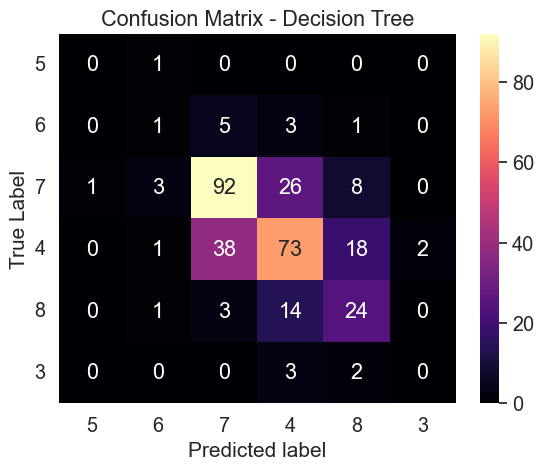

<Figure size 1000x700 with 0 Axes>

In [8]:
# Get the best estimator
my_best_estimator = my_search.best_estimator
# Fit the model
my_best_estimator.fit(x_train, y_train)
# Predict the test data
y_pred = my_best_estimator.predict(x_test)
# Get the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy", accuracy)
# Get the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(confusion)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
ax.set_xticklabels(list(labels))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()